# OpenCV-图像操作与增强知识梳理
----

**文本涉及到的知识点：**

- 介绍灰度分析与变换
- 介绍空间域图像增强
- 特征分析


### 安装 opencv-python

确保python环境安装了[opencv-python](https://opencv.org/releases/) ，如果没有，执行命令：


```
pip install opencv-python

```


## 灰度分析与变换

图像`灰度分析`是图像分析中最基本的内容，它使用各种图像灰度分析工具，提取图像或 ROI 区域内的灰度特征信息。

基于对图像灰度的分析测量，可以实现最基本的机器视觉检测系统，如目标存在性检测系统等。

###  直方图介绍

**直方图（histogram）**是最基本的图像灰度分析工具。

使用它不仅可以判断图像中是否包含可从背景中分割出的区域、图像的饱和度和对比度是否适合检测任务，还能确定应该如何对图像采集系统进行调整以获得较高质量的图像。

图像的直方图包含了丰富的图像信息，描述了图像的灰度级内容，反映了图像的灰度分布情况。

图像的灰度直方图以图表的方式显示了图像中每个灰度级与其所对应像素数量的关系。

图表的横坐标为灰度级，纵坐标是各个灰度级在图像中出现的频率。

直方图是图像最基本的统计特征，其中像素数量可被看作灰度级的函数。

从概率论的角度来看，灰度出现的频率可被看作其出现的概率，这样直方图就对应于概率密度函数（Probability Density Function，PDF），而概率分布函数就是直方图的累计和，即概率密度函数的积分。

要深刻理解直方图我们可以使用 windows版本[Shotwell](https://shotwell.en.softonic.com/download)软件中的`adjust` 可以直观的的查看图片的直方图并可以调试相关参数，效果如图：

![img.png](../images/opencv_002.png)

图 11 直方图参数解释


- 第一行：曝光（Exposure）
- 第二行：饱和度（Saturation）
- 第三行：色度（Tint）
- 第四行：温度（Temperature）
- 第五行：阴影度（shadows）
- 第六行：亮度（Highlights）`下载的windows版本缺少高亮，尴尬的软件`

我们可以调节这六个参数去观察直方图的变化去理解直方图的意义，例如我将亮度调节到最低此时直方图末尾将被抑制下去。

![img.png](../images/opencv_003.png)

### 直方图绘制

OpenCV 提供了函数 `cv2.calcHist() `用来计算图像的统计直方图，该函数能统计各个灰度级的像素点个数。利用` matplotlib.pyplot` 模块中的 `plot()` 函数，可以将函数 `cv2.calcHist()` 的统计结果绘制成直方图。

**函数原型：**

```
cv2.calcHist(images, channels, mask, histSize, ranges, accumulate) 

```

第一个参数 **image** 为原始图像，该图像需要使用必须用方括号括起来。

第二个参数 **channels** 为指定通道编号。通道编号需要用方括号括起来，如果输入图像是单通道灰度图像，该参数的值就是 [0]。对于彩色图像，它的值可以是 [0]、[1]、[2]，分别对应通道 B、G、R。

第三个参数 **Mask** 为掩模图像，当统计整幅图像的直方图时，将这个值设为 None。当统计图像某一部分的直方图时，需要用到掩模图像。

第四个参数 **histSize** 表示这个直方图分成多少份（即多少个直方柱），BINS 的值是 256，需要使用“[256]” 作为此参数值。

第五个参数 **ranges** 表示直方图中各个像素的值，8 位灰度图像的像素值范围是 [0,255]。

第六个参数 **accumulate** 表示为累计（累积、叠加）标识，默认值为 `False`。如果被设置为 `True`，则直方图在开始计算时不会被清零，计算的是多个直方图的累积结果，用于对一组图像计算直方图。


要理解直方图，绕不开“亮度”这个概念。人们把照片的亮度分为 0 到 255 共 256 个数值，数值越大，代表的亮度越高。其中 0 代表纯黑色的最暗区域，255 表示最亮的纯白色，而中间的数字就是不同亮度的灰色。人们还进一步把这些亮度分为了 5 个区域，分别是黑色、阴影、中间调、高光和白色。

然后可以使用 matplotlib.pyplot 模块内的 plot() 函数，可以将函数 cv2.calcHist() 的返回值绘制为图像直方图。下面通过三个例子来学习 plot() 函数的基本使用方法。

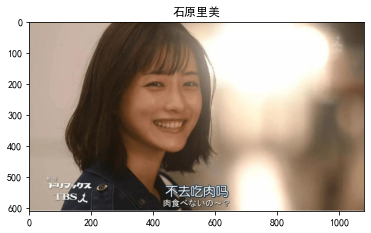

In [11]:
import cv2                         
import os
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
img = Image.open("../images/sylm.png")

plt.figure("石原里美") # 图像窗口名称
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('石原里美') # 图像题目
plt.show()

**绘制灰度直方图**

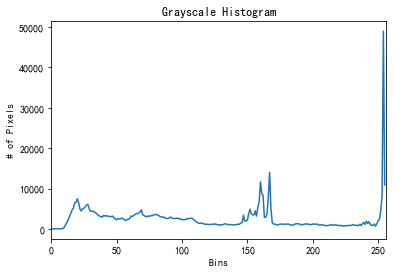

In [16]:
from matplotlib import pyplot as plt
import cv2

image = cv2.imread('../images/sylm.png')

#图像直方图
hist = cv2.calcHist([image],[0],None,[256],[0,256])

plt.figure()                        #新建一个图像
plt.title("Grayscale Histogram")    #图像的标题
plt.xlabel("Bins")                  #X轴标签
plt.ylabel("# of Pixels")           #Y轴标签
plt.plot(hist)                      #画图
plt.xlim([0,256])                   #设置x坐标轴范围
plt.show()                          #显示图像


**绘制彩色直方图**

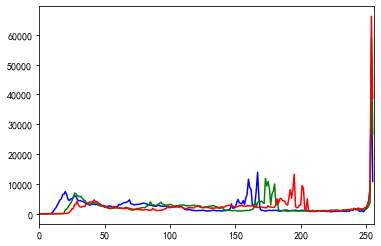

In [15]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### 空间域图像增强

图像在其采集或传递过程中常会受到各种噪声的影响，这会导致其中包含的重要信息很难被读取和识别。例如，不均匀的光照会使图像灰度过于集中，摄像头的数模转换电路所产生的噪声会使图像质量降低，图像显示设备的局限性会造成图像显示颜色减少，等等。因此，在对图像进行分析处理之前，必须对图像进行增强，使其更适合人或机器进一步分析处理。

图像常被各种随机噪声污染，如椒盐（salt&pepper）噪声、脉冲噪声、高斯噪声等。椒盐噪声会导致图像中有随机出现的黑点或白点；脉冲噪声则使图像中只含有随机的白点（正脉冲噪声）或黑点（负脉冲噪声）；与前两者不同，高斯噪声则会使图像含有强度服从高斯正态分布的噪声。在正式对图像进行识别并做出决策前，需要滤除各种噪声并突出需要识别的各种特征。图像的邻域增强，就是在空间域对其进行高通或低通滤波，以消除其中的噪声、锐化图像的轮廓，沿某一方向锐化目标的边缘等。

#### 均值滤波 

均值滤波是指用当前像素点周围 $N×N$ 个像素值的均值来代替当前像素值。使用该方法遍历处理图像内的每一个像素点，即可完成整幅图像的均值滤波。

**函数原型：**

```
cv2.blur（src,ksize,anchor,borderType）

```
第一个参数 src 为需要处理的图像，即原始图像。它能够有任意数量的通道，并能对各个通道独立处理。

第二个参数 ksize 是滤波核的大小。滤波核大小是指在滤波处理过程中所选择的邻域图像的高度和宽度。

第三个参数 anchor 是锚点，其默认值是（-1,-1），表示当前计算均值的点位于核的中心点位置。该值使用默认值即可，在特殊情况下可以指定不同的点作为锚点。

第四个参数 borderType 是边界样式，该值决定了以何种方式处理边界，一般情况下不需要考虑该值的取值，直接采用默认值即可。

In [ ]:
#encoding:utf-8

import numpy as np
import cv2

image = cv2.imread('../images/sylm.png')

#均值滤波
blurred = np.hstack([cv2.blur(image,(3,3)),
                     cv2.blur(image,(5,5)),
                     cv2.blur(image,(7,7))
                     ])
cv2.imshow("Gaussian",blurred)
cv2.waitKey(0)

#### 方框滤波

In [ ]:
OpenCV 还提供了方框滤波方式，与均值滤波的不同在于，方框滤波不会计算像素均值。在均值滤波中，滤波结果的像素值是任意一个点的邻域平均值，等于各邻域像素值之和除以邻域面积。而在方框滤波中，可以自由选择是否对均值滤波的结果进行归一化，即可以自由选择滤波结果是邻域像素值之和的平均值，还是邻域像素值之和。

函数原型：
```
cv2.boxFilter（src,ddepth,ksize,anchor,normalize,borderType）

```

第一个参数 src 为需要处理的图像，即原始图像。它能够有任意数量的通道，并能对各个通道独立处理。

第二个参数 ddepth 是处理结果图像的图像深度，一般使用 -1 表示与原始图像使用相同的图像深度。

第三个参数 ksize 是滤波核的大小。滤波核大小是指在滤波处理过程中所选择的邻域图像的高度和宽度。

第四个参数 anchor，其默认值是（-1,-1），表示当前计算均值的点位于核的中心点位置。

第五个参数 normalize 表示在滤波时是否进行归一化。

第六个参数 borderType 是边界样式，该值决定了以何种方式处理边界。

In [ ]:
#encoding:utf-8

import numpy as np
import cv2

image = cv2.imread('../images/sylm.png')

#方框滤波
blurred = np.hstack([cv2.boxFilter(image,-1,(3,3)),
                     cv2.boxFilter(image,-1,(5,5)),
                     cv2.boxFilter(image,-1,(7,7))
                     ])
cv2.imshow("Gaussian",blurred)
cv2.waitKey(0)

#### 高斯滤波


在高斯滤波中，会将中心点的权重值加大，远离中心点的权重值减小，在此基础上计算邻域内各个像素值不同权重的和。

函数原型：

```
cv.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None)
```

第一个参数 src 为需要处理的图像，即原始图像。它能够有任意数量的通道，并能对各个通道独立处理。

第二个参数 ksize 为滤波核的大小。滤波核大小是指在滤波处理过程中其邻域图像的高度和宽度。

第三个参数 sigmaX 是卷积核在水平方向上（X 轴方向）的标准差，其控制的是权重比例。

后两个参数为 None。

在实际使用中，高斯滤波使用的可能是不同大小的卷积核。例如，图 17 中分别是 3×3、5×5、7×7 大小的卷积核。在高斯滤波中，核的宽度和高度可以不相同，但是它们都必须是奇数

In [ ]:
#encoding:utf-8

import numpy as np
import cv2

image = cv2.imread('../images/sylm.png')

#高斯滤波
blurred = np.hstack([cv2.GaussianBlur(image,(3,3),0),       //卷积核宽度为3
                     cv2.GaussianBlur(image,(5,5),0),       //卷积核宽度为5
                     cv2.GaussianBlur(image,(7,7),0)        //卷积核宽度为7
                     ])
cv2.imshow("Gaussian",blurred)
cv2.waitKey(0)

#### 中值滤波

中值滤波与前面介绍的滤波方式不同，不再采用加权求均值的方式计算滤波结果。它用邻域内所有像素值的中间值来替代当前像素点的像素值。

中值滤波会取当前像素点及其周围临近像素点（一共有奇数个像素点）的像素值，将这些像素值排序，然后将位于中间位置的像素值作为当前像素点的像素值。

函数原型：
```
cv2.medianBlur（src,ksize）

```

第一个参数 src 为需要处理的图像，即原始图像。它能够有任意数量的通道，并能对各个通道独立处理。

第二个参数 ksize 为滤波核的大小。滤波核大小是指在滤波处理过程中其邻域图像的高度和宽度。


In [ ]:
import numpy as np
import cv2

image = cv2.imread('../images/sylm.png')


cv2.imshow("Original",image)
cv2.waitKey(0)

#中值滤波
blurred = np.hstack([cv2.medianBlur(image,3),
                     cv2.medianBlur(image,5),
                     cv2.medianBlur(image,7)
                     ])
cv2.imshow("Median",blurred)
cv2.waitKey(0)

## 特征分析



机器视觉系统基于数字图像中的信息进行决策。若系统算法不分主次，让所有图像数据都参与到目标识别或分类的计算过程中，机器视觉系统的实时性就很难得到保证。为了确保系统的实时性，最大限度地利用系统的能力，有必要关注“关键信息”。在机器视觉工程实践中，通常会先确定一个或多个能有效代表被测目标的量化特征，再基于这些特征完成机器决策任务，从而提高系统自动识别的能力。

下图显示了常见的特征提取过程。一般来说，在从图像中提取样本特征前，都先要对图像在空间域或频域进行预处理，包括对图像在空间域进行平滑、锐化以及滤除噪声等处理。经预处理后的图像仍为二维数字图像，只是相对于原始图像来说更便于处理。图像分割（image segmentation）过程可以进一步简化图像分析、处理和机器决策过程，它根据图像的灰度、颜色、纹理或形状等参数，将其划分成不同的子区域，并使这些参数在同一区域内呈现相似性，而在不同区域之间呈现明显的差异性。图像分割过程本质上是对图像中具有相同特征的区域进行标记的过程，其输出一般为二值图像，用 0 表示背景，用 1 或自定义的值表示目标区域。

分割后的二值图像中常包含不必要的信息，如噪声、相互交叠的区域、与图像边界交叠的区域等，图像形态学处理过程能消除这些区域，有效地增强二值图像中的有用信息。特征提取过程可基于图像中的点、线、颗粒（particle）确定能准确测量或识别目标的特征，例如颗粒区域的直径、周长、面积、区域中心等。一旦确定了图像中目标的特征，机器视觉算法就可以基于这些特征进行测控及决策。

![img.png](../images/opencv_tz01.png)


图像分割与特征提取是简化机器视觉算法的有效手段之一。它将图像分成一些有意义的区域，以便特征提取过程可基于这些区域提取目标的特征。此处提到的区域是指其中所有像素都相邻或相接触的集合，是像素的连通集。连通集中任意两个像素之间都存在一条完全由该集合的元素构成的连通路径。连通路径是一条可在相邻像素间移动的路径。图像分割的基础是像素的相似性和跳变性，如灰度、纹理相似或突变等。经图像分割过程得到的区域一般互不交叠，每个区域内部的某种特性相同或接近，而不同区域间的特性则有明显差别。

图像分割的方法较多，依据处理的对象不同可分为点、线和区域分割法。若根据分割算法来分，则有阈值分割法、边缘分割法、区域分割法和形态学分割法等。本节将着重介绍图像阈值分割和边缘分割技术。

### 阈值分割

图像阈值分割法（thresholding）可将图像按照不同灰度分成两个或多个等间隔或不等间隔灰度区间。它主要利用检测目标与背景在灰度上的差异，选取一个或多个灰度阈值，并根据像素灰度与阈值的比较结果对像素进行分类，用不同的数值分别标记不同类别的像素，从而生成二值图像。由于物体与背景以及不同物体之间的灰度通常存在明显差异，在图像灰度直方图中会呈现明显的峰值，因此，若选择图像灰度直方图中灰度分布的谷底作为阈值，即可对图像进行分割。

图像阈值分割是一种最常用的图像分割方法，它对目标与背景有较强对比度的图像分割特别有用。由于它能用封闭且连通的边界定义不交叠的区域，且计算特别简单，因此常被用于各种基于二值图像进行分析决策的机器视觉算法预处理过程。

#### 二值化阈值处理

二值化阈值处理会将原始图像处理为仅有两个值的二值图像，其示意图如图所示。其针对像素点的处理方式为：

对于灰度值大于阈值 thresh 的像素点，将其灰度值设定为最大值。
对于灰度值小于或等于阈值 thresh 的像素点，将其灰度值设定为 0。

![img.png](../images/opencv_tz02.png)


In [ ]:
import cv2

img=cv2.imread（"lena.bmp"）
t,rst=cv2.threshold（img,127,255,cv2.THRESH_BINARY_INV）
cv2.imshow（"img",img）
cv2.imshow（"rst",rst）
cv2.waitKey() 
cv2.destroyAllWindows() 

运行程序，结果如图所示，其中左图是原始图像，右图是反二值化阈值处理结果。

#### 反二值化阈值处理

反二值化阈值处理的结果也是仅有两个值的二值图像，与二值化阈值处理的区别在于，二者对像素值的处理方式不同。反二值化阈值处理针对像素点的处理方式为：

对于灰度值大于阈值的像素点，将其值设定为 0。

对于灰度值小于或等于阈值的像素点，将其值设定为 255。

反二值化阈值处理方式的示意图如图所示。

![img.png](../images/opencv_tz03.png)


In [ ]:
mport cv2
img=cv2.imread("lena.bmp")
t,rst=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
cv2.imshow("img",img)
cv2.imshow("rst",rst)
cv2.waitKey() 
cv2.destroyAllWindows() 

运行程序，结果如图所示，其中左图是原始图像，右图是截断阈值化处理结果。

#### 截断阀值化处理

截断阈值化处理会将图像中大于阈值的像素点的值设定为阈值，小于或等于该阈值的像素点的值保持不变。这种处理方式的示意图如图所示。

![img.png](../images/opencv_tz04.png)


In [ ]:
import cv2
img=cv2.imread("lena.bmp")
t,rst=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
cv2.imshow("img",img)
cv2.imshow("rst",rst)
cv2.waitKey() 
cv2.destroyAllWindows() 

#### 超阀值零处理

超阈值零处理会将图像中大于阈值的像素点的值处理为 0，小于或等于该阈值的像素点的值保持不变。即先选定一个阈值，然后对图像做如下处理：

对于像素值大于阈值的像素点，其像素值将被处理为 0。
对于像素值小于或等于阈值的像素点，其像素值将保持不变。
超阈值零处理的工作原理如图示。

![img.png](../images/opencv_tz05.png)

超阀值零处理

In [ ]:
import cv2
img=cv2.imread（"lena.bmp"）
t,rst=cv2.threshold（img,127,255,cv2.THRESH_TOZERO_INV）
cv2.imshow（"img",img）
cv2.imshow（"rst",rst）
cv2.waitKey（）
cv2.destroyAllWindows（）



## 总结

#### 本文重点内容概括：

- 绘制直方图
- 均值滤波
- 方框滤波
- 高斯滤波
- 中值滤波

#### 学习资料：

[OpenCV 实战之图像操作与增强.by gitbook Allen](https://gitbook.cn/books/5e4ff1910209a570b2175dc4/index.html)